# Supervised Learning

## Setup environment

In [ ]:
# Load all libraries
from sklearn import  datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

# Load Dataset

In [ ]:
iris = datasets.load_iris()

x=iris.data   # data that contains 4 features of 150 samples.
y=iris.target # labels with ground truth information

# split the data into split% training and (100-split)% testing
split = 0.9
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=split)

# Generic function to train and evaluate

In [ ]:
def trainevaluate(classfier, name, values,x_train,x_test,y_train,y_test):
    '''method to train and evalauate based on given classifier, depth/neighbours values on given dataset'''
    accuracies = []
    high_accuracy_index = 0
    high_accuracy = None
    for  i in range(len(values)):
        setattr(classfier,name, values[i])
        classfier.fit(x_train, y_train)
        predictions=classfier.predict(x_test)
        # finding accuracies
        accuracy = accuracy_score(y_test,predictions)
        if (high_accuracy):
            if high_accuracy < accuracy:
                high_accuracy = accuracy
                high_accuracy_index = i+1
        else:
            high_accuracy = accuracy
            high_accuracy_index = i+1

        accuracies.append(accuracy)
        #print the result
        #print(f"{type(classfier).__name__} ({name}={values[i]}) = %0.2f accuracy" %accuracy)
    return (accuracies,round(high_accuracy,3),high_accuracy_index)



In [ ]:
#mxdepth = 1
mx_depth = list(range(1,11))
#classifier1 = DecisionTreeClassifier(max_depth=mxdepth)
classifier1 = DecisionTreeClassifier()
(classifier1_accuracy, classifier1_high_acuracy, classifier1_high_accuracy_index) = trainevaluate(classifier1,"max_depth",mx_depth,x_train,x_test,y_train,y_test)

In [ ]:
k = list(range(1,11))
#classifier2 = KNeighborsClassifier(n_neighbors=k)
classifier2 = KNeighborsClassifier()
(classifier2_accuracy, classifier2_high_acuracy, classifier2_high_accuracy_index) = trainevaluate(classifier2,"n_neighbors",k,x_train,x_test,y_train,y_test)

**Color Codes** <br>

|Color|	Code|
|-----|-----|
|Black|	30|
|Red	|31|
|Green	|32|
|Yellow	|33|
|Blue|34|
|Magenta	|35|
|Cyan	|36|
|White	|37|

In [ ]:
def color_text(text, color_code):
  return f"\033[{color_code}m{text}\033[0m"

# Example usage
# print(f"This is {color_text('red', 31)} and this is {color_text('blue', 34)}.")

This is red and this is blue.


In [ ]:
import pandas as pd
print(f"{color_text('Note: ',31)} Values may change with every rerun of the program")

# Create a dictionary to store the data
data = {
    'Classifier': ['DecisionTreeClassifier', 'KNeighborsClassifier'],
    'Highest Accuracy': [classifier1_high_acuracy, classifier2_high_acuracy],
    'Depth or Neighbors': [classifier1_high_accuracy_index, classifier2_high_accuracy_index]
}

# Create a pandas DataFrame from the dictionary
df = pd.DataFrame(data)

# Print the DataFrame as a table
print(f"\n {color_text('Highest accuracies achieved with depths/neighbors between 1 to 10', 34)} \n")
print(df.to_string(index=True))

Note:  Values may change with every rerun of the program

 Highest accuracies achieved with depths/neighbors between 1 to 10 

               Classifier  Highest Accuracy  Depth or Neighbors
0  DecisionTreeClassifier             0.881                  10
1    KNeighborsClassifier             0.889                   1


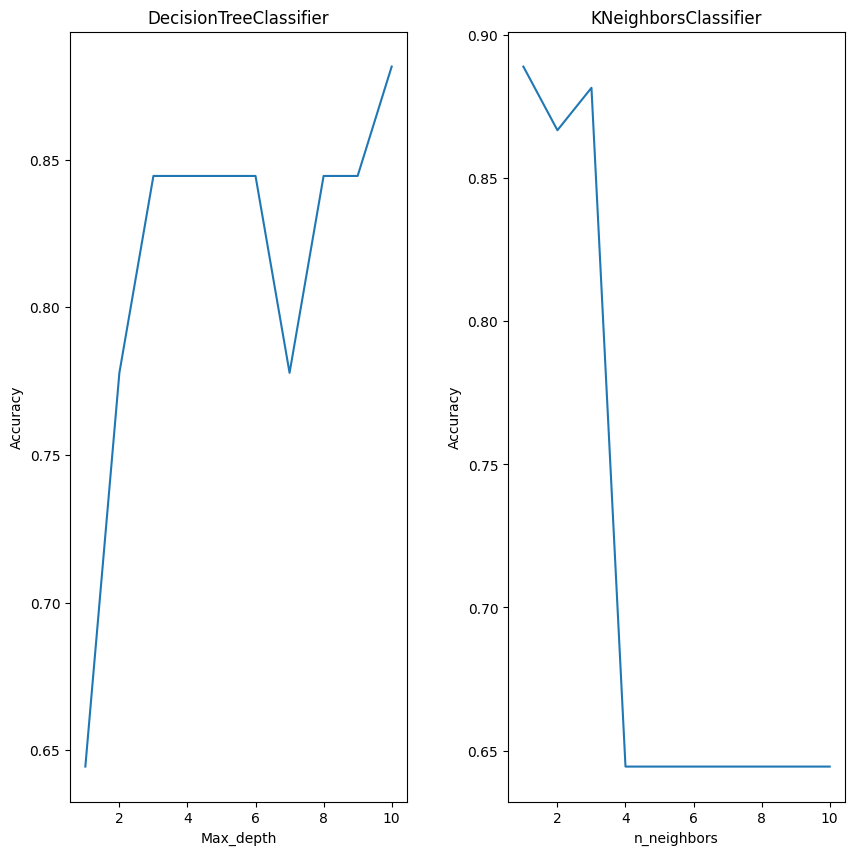

In [ ]:
#plot the accuracy from both classifiers
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(mx_depth, classifier1_accuracy)
plt.title('DecisionTreeClassifier')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(k, classifier2_accuracy)
plt.title('KNeighborsClassifier')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.subplots_adjust(wspace=0.3)

plt.show()

The data contains 4 different features namely sepal length, sepal width, petal length, and petal width. <br>
It is important to recognize which feature set(s) performs the best. Determine the best combination based on  experiment. We have 10 different combinations possible (e.g. {SL, SW, PL, PW, (SL,SW), (SL, PL)...(SL, SW, PL, PW)} <br>

We will show different performance after based on the best training parameters identified earlier. <br>

This may show that the more number of features doesn't end up with better accuracy necessarily. we will have the performance results per 10 combinations and plot the results on a graph for each classifier. <br>

Refer to the topic in the "curse of dimensionality" <br>
Resource : https://en.wikipedia.org/wiki/Curse_of_dimensionality


In [ ]:
dtc_depth = []
dtc_depth.append(classifier1_high_accuracy_index)
knn_depth = []
knn_depth.append(classifier2_high_accuracy_index)

In [ ]:
# creating feature combinations
feature_combinations = [(i,) for i in range(4)] + [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (0,1,2),(0,1,3),(1,2,3),(0, 1, 2, 3)]
no_fc = len(feature_combinations)


In [ ]:
# variable to hold the location on plot's xaxis
i=0
# Variable to hold the feature that provides highest accuracy
dtc_accuracy = []
knn_accuracy = []


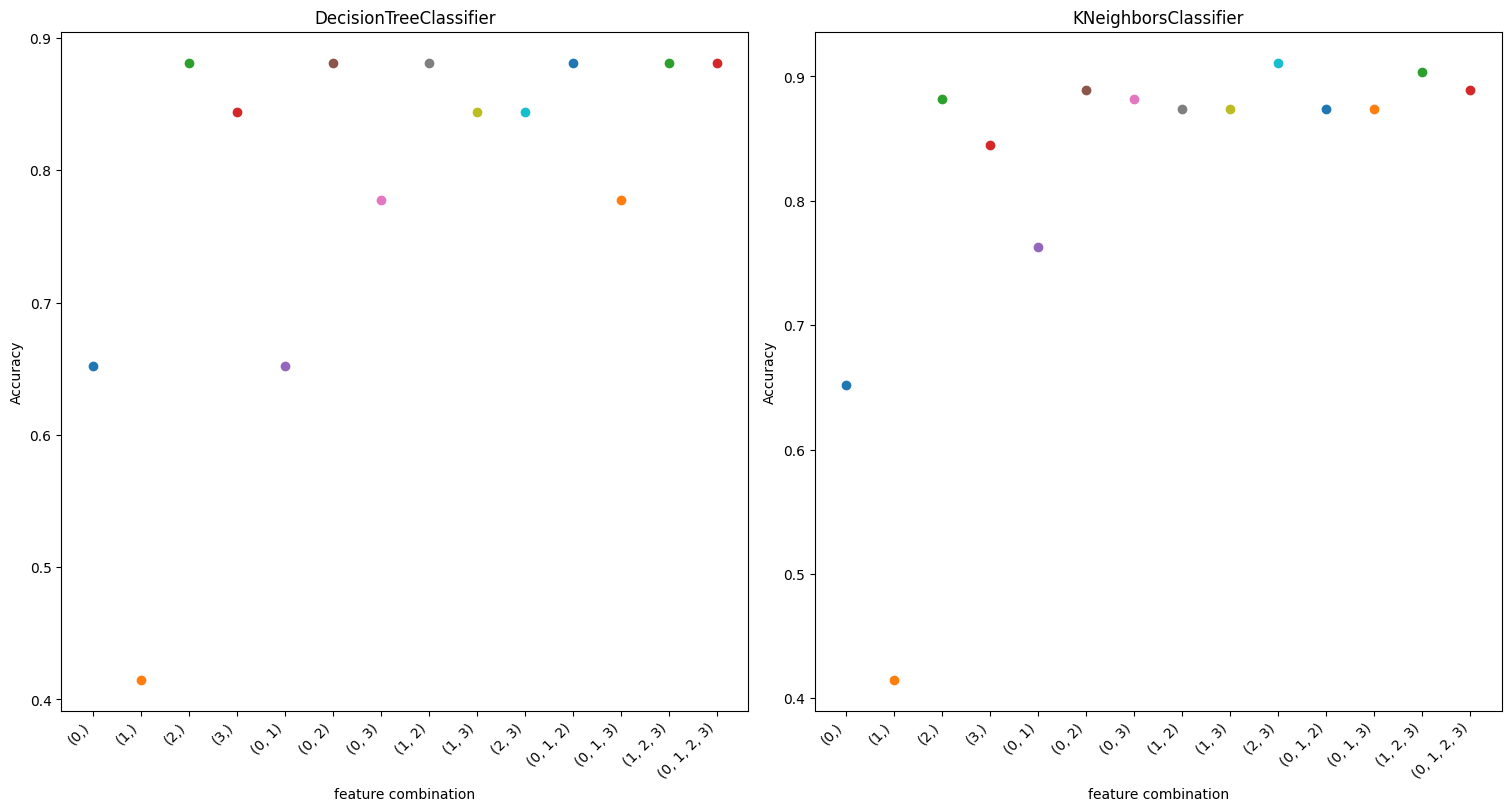

In [ ]:
# define the figure. We will draw two plots. one for DTC and second one KNN
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8),layout="constrained")
# ax1 has plots for all combinations of DTC model
ax1 = plt.subplot(1,2,1)
# ax2 has plots for all combinations of KNN model
ax2 = plt.subplot(1,2,2)
for features in feature_combinations:
    # Select the specified features
    x_train_subset = x_train[:, features]
    x_test_subset = x_test[:, features]
    # train and evaluate for each feature combination
    (classifier1_accuracy, classifier1_high_acuracy, classifier1_high_accuracy_index) = trainevaluate(classifier1,"max_depth",dtc_depth,x_train_subset,x_test_subset,y_train,y_test)
    (classifier2_accuracy, classifier2_high_acuracy, classifier2_high_accuracy_index) = trainevaluate(classifier2,"n_neighbors",knn_depth,x_train_subset,x_test_subset,y_train,y_test)
    #plot the accuracy from both classifiers
    plotlabel = str(features)
    ax1.scatter(i,classifier1_accuracy,label=plotlabel)
    ax2.scatter(i,classifier2_accuracy,label=plotlabel)
    i = i+1
    # It gets only one accuracy. however we get in a list object so select maximum
    dtc_accuracy.append(max(classifier1_accuracy))
    knn_accuracy.append(max(classifier2_accuracy))
    #plot the results using scatter plot
ax1.set(title="DecisionTreeClassifier",xlabel="feature combination",ylabel="Accuracy")
ax1.xaxis.set_major_locator(mticker.FixedLocator(list(range(no_fc))))
ax1.set_xticklabels(feature_combinations,rotation=45,ha='right')

#ax1.legend()
ax2.set(title='KNeighborsClassifier',xlabel="feature combination",ylabel="Accuracy")
ax2.xaxis.set_major_locator(mticker.FixedLocator(list(range(no_fc))))
ax2.set_xticklabels(feature_combinations,rotation=45,ha='right')
#ax2.set_yticks(ax1.get_yticks().tolist())
plt.show()


In [ ]:
print("\n with the identified depths / neighbours, heighest accuracy achieved with the following combinations of features")
print("\nDecisionTreeClassifier: maximum accuracy ", max(dtc_accuracy) , " is achieved with feature list ", feature_combinations[dtc_accuracy.index(max(dtc_accuracy))])
print("KNeighborsClassifier: maximum accuracy ", max(knn_accuracy) , " is achieved with feature list ", feature_combinations[knn_accuracy.index(max(knn_accuracy))])
#print("\nWhen there are two features, accuracy reached maximum. When additional features added accuracy either decreased or achieved same accuracy\n")


 with the identified depths / neighbours, heighest accuracy achieved with the following combinations of features

DecisionTreeClassifier: maximum accuracy  0.8814814814814815  is achieved with feature list  (2,)
KNeighborsClassifier: maximum accuracy  0.9111111111111111  is achieved with feature list  (2, 3)


Once you decide the best feature set(s), it is important to recognize how the size of training set versus testing set (or ratio between sets) would influence the overall representative performance. You will have the performance results per 10%, 20% ... 90% and plot the results on a graph for each classifier with your analysis in words.



 with the identified depths / neighbours and combinations of features, maximum accuracy achievied at data sizes as shown below:

DecisionTreeClassifier: maximum accuracy  0.9666666666666667  is achieved at data size of  60.0 % of actual data
KNeighborsClassifier: maximum accuracy  0.6956521739130435  is achieved at data size of  70.0 % of actual data

Note: Values may change with every rerun of the program


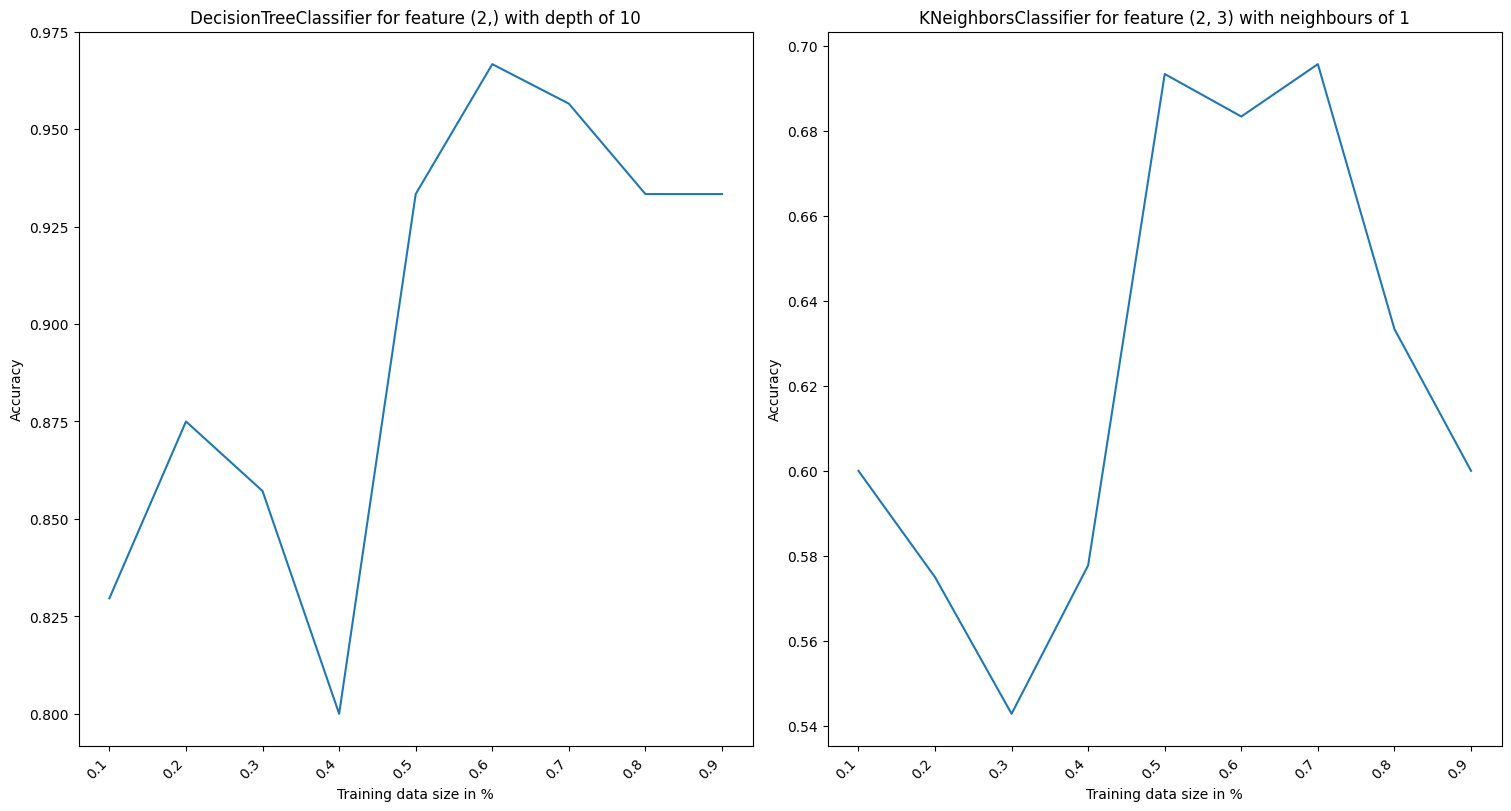

In [ ]:
def train_eval_sizes(classifier, feature_indices, train_sizes):
    accuracies = []
    for size in train_sizes:
       # Splitting data into training and testing sets with the specified size
        x_train_subset, x_test_subset, y_train_subset, y_test_subset = train_test_split(x[:, feature_indices], y, test_size=1 - size, random_state=42)
        classifier.fit(x_train_subset, y_train_subset)
        predictions = classifier.predict(x_test_subset)
        # Calculate accuracy and store it
        accuracy = accuracy_score(y_test_subset, predictions)
        accuracies.append(accuracy)
    return accuracies

# variables holding the best featureset for each classifier
dtc_feature = feature_combinations[dtc_accuracy.index(max(dtc_accuracy))]
knn_feature = feature_combinations[knn_accuracy.index(max(knn_accuracy))]
# training sizes with 10% difference
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# createa DNN classifier with identifed depth in problem 1
dtcclassifier = DecisionTreeClassifier(max_depth=dtc_depth[0])
# train again with identified features in problem 2 and identified depth in problem 1 with varied sizes
dtc_accuracies = train_eval_sizes(dtcclassifier,dtc_feature,train_sizes)

# createa KNN classifier with identifed depth in problem 1
knnclassifier = DecisionTreeClassifier(max_depth=knn_depth[0])
# train again with identified features in problem 2 and identified depth in problem 1 with varied sizes
knn_accuracies = train_eval_sizes(knnclassifier,knn_feature,train_sizes)

print("\n with the identified depths / neighbours and combinations of features, maximum accuracy achievied at data sizes as shown below:")
print("\nDecisionTreeClassifier: maximum accuracy ", max(dtc_accuracies) , " is achieved at data size of ", train_sizes[dtc_accuracies.index(max(dtc_accuracies))]*100, "% of actual data")
print("KNeighborsClassifier: maximum accuracy ", max(knn_accuracies) , " is achieved at data size of ", train_sizes[knn_accuracies.index(max(knn_accuracies))]*100, "% of actual data")
print()

print("Note: Values may change with every rerun of the program")

# define the figure. We will draw two plots. one for DTC and second one KNN
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8),layout="constrained")
ax1 = plt.subplot(1,2,1)    # plot to hold accuracies for dtc model
ax2 = plt.subplot(1,2,2)    # plot to hold accuracies for knn model
#plot line plots
ax1.plot(train_sizes,dtc_accuracies)
ax2.plot(train_sizes,knn_accuracies )

#set the properties of plot1
ax1.set(title=f"DecisionTreeClassifier for feature {dtc_feature} with depth of {dtc_depth[0]}",xlabel="Training data size in %",ylabel="Accuracy")
ax1.xaxis.set_major_locator(mticker.FixedLocator(train_sizes))
ax1.set_xticklabels(train_sizes,rotation=45,ha='right')

#set the properties of plot2
ax2.set(title=f'KNeighborsClassifier for feature {knn_feature} with neighbours of {knn_depth[0]}',xlabel="Training data size in %",ylabel="Accuracy")
ax2.xaxis.set_major_locator(mticker.FixedLocator(train_sizes))
ax2.set_xticklabels(train_sizes,rotation=45,ha='right')
plt.show()



